In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
demo = pd.read_csv('Internet-Demographic.csv')

In [4]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [5]:
demo['Country Name'] = demo['Country Name'].astype('category')
demo['Country Code'] = demo['Country Code'].astype('category')
demo['Income Group'] = demo['Income Group'].astype('category')

In [6]:
demo.dtypes

Country Name      category
Country Code      category
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

In [7]:
demo.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

<h1>Distribution of birth rates</h1>

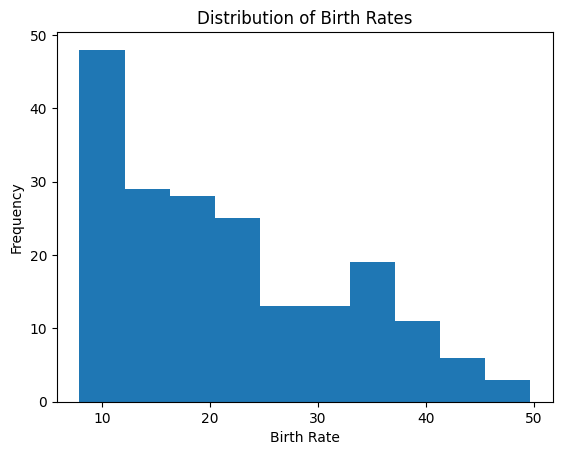

Birth rate
10.200    5
9.200     4
12.500    3
8.500     3
9.400     2
         ..
32.947    1
20.850    1
42.394    1
40.471    1
35.715    1
Name: count, Length: 177, dtype: int64

In [41]:
rates = demo['Birth rate'].value_counts()
rates
plt.hist(demo["Birth rate"] )
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Rates')

plt.show()
rates

<h1>top 5 countries with  highest internet usage</h1>

In [43]:
demo['Internet users'].mean()

np.float64(42.07647089194872)

In [46]:
demo2 = demo[demo['Internet users']> 42]

In [48]:
demo2['Internet users'].mean()

np.float64(67.686133746875)

In [49]:
demo3 = demo2[demo2['Internet users']> 67]

In [50]:
demo3['Internet users'].mean()

np.float64(81.75577865999999)

In [51]:
demo4 = demo3[demo3['Internet users']>94]

In [52]:
demo4['Internet users'].mean()

np.float64(95.2627)

In [53]:
demo4

,Country Name,Country Code,Birth rate,Internet users,Income Group
22,Bermuda,BMU,10.4,95.3000,High income
47,Denmark,DNK,10.0,94.6297,High income
84,Iceland,ISL,13.4,96.5468,High income
131,Norway,NOR,11.6,95.0534,High income
163,Sweden,SWE,11.8,94.7836,High income


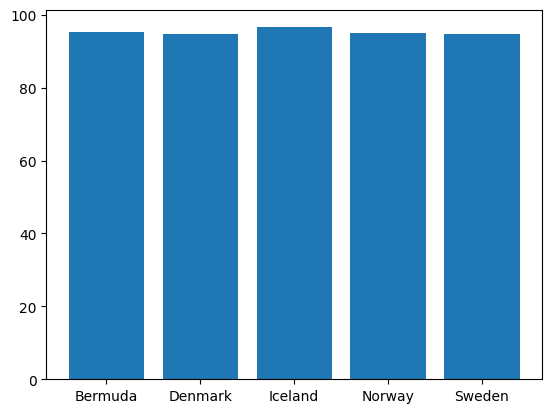

In [54]:
plt.bar(demo4['Country Name'],demo4['Internet users'])
plt.show()

<h1>The average internet usage across all countries is 81.76%. Among countries with internet usage above 94%, the average rises to 95.26%. The top-performing countries—Bermuda, Denmark, Iceland, Norway, and Sweden—all belong to the high-income group, suggesting a strong link between economic status and high internet adoption rates.</h1>

<H1>Count of countries per income group</H>

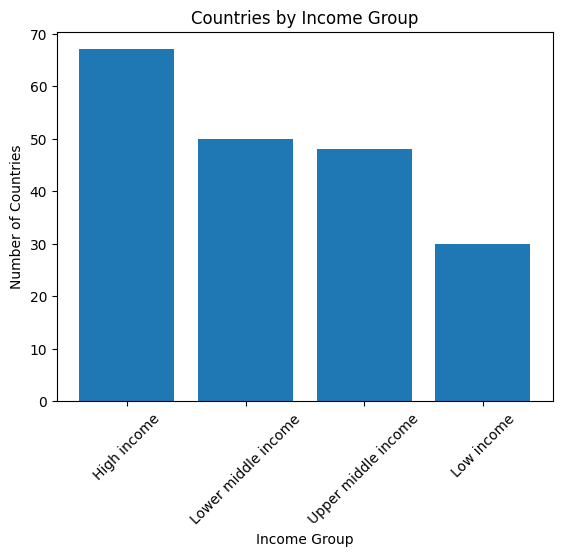

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64

In [55]:
income_group_counts = demo["Income Group"].value_counts()

plt.bar(income_group_counts.index, income_group_counts.values,)  
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.title('Countries by Income Group')
plt.xticks(rotation=45)
plt.show()
income_group_counts

<h1>The data shows that high-income countries dominate, with 67 countries in this group. The other income groups have fewer countries: lower middle income (50 countries), upper middle income (48 countries), and low income (30 countries). This distribution highlights the global economic disparity across different income levels.</h1>

<h1>Box plot of internet usage</h1>

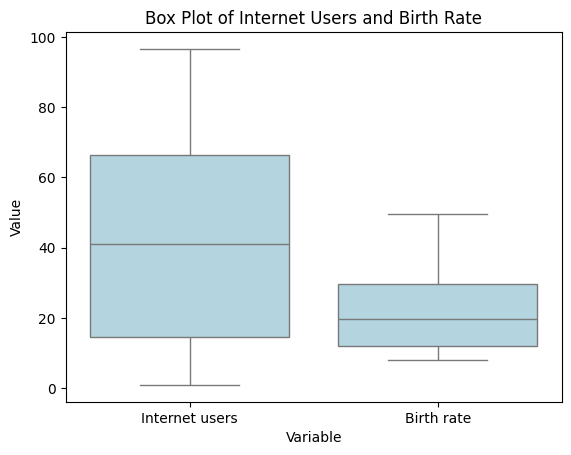

In [58]:

demo_melted = demo.melt(value_vars=["Internet users", "Birth rate"], var_name="Variable", value_name="Value")
sns.boxplot(x="Variable", y="Value", data=demo_melted, color='lightblue')
plt.ylabel('Value')
plt.title('Box Plot of Internet Users and Birth Rate')
plt.show()


<h1>Countries with no internet access</h1>

In [59]:
no_internet = demo[demo["Internet users"] == 0][["Country Name", "Country Code"]]
print("Countries with No Internet Access:")
no_internet


Countries with No Internet Access:


,Country Name,Country Code


<h1>there is no countries with zero internet access</h1>

<h1>Average Birth rate</h1>

In [18]:
avg_birth_rate = demo["Birth rate"].mean()
print(f'Average Birth Rate: {avg_birth_rate:.2f}')


Average Birth Rate: 21.47


<h1>scatterplot birth rate vs internet</h1>

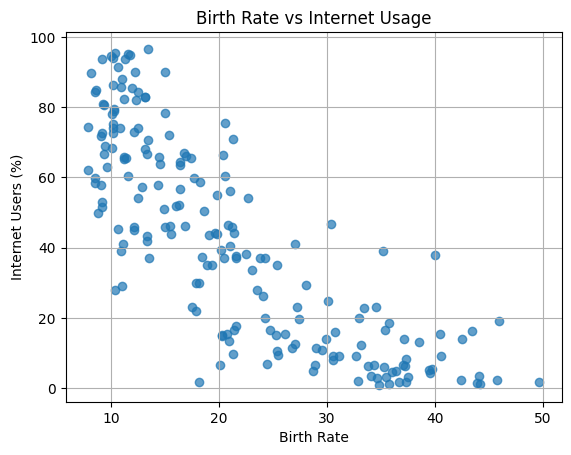

In [32]:
plt.scatter(demo["Birth rate"], demo["Internet users"],  alpha=0.7)
plt.xlabel('Birth Rate')
plt.ylabel('Internet Users (%)')
plt.title('Birth Rate vs Internet Usage')
plt.grid(True)
plt.show()


<h1>Countries with birth rates above 40</h1>

In [20]:
high_birth_rate = demo[demo["Birth rate"] > 40]
print("Countries with Birth Rates Above 40:\n", high_birth_rate[["Country Name", "Birth rate"]])


Countries with Birth Rates Above 40:
          Country Name  Birth rate
2              Angola      45.985
11            Burundi      44.151
14       Burkina Faso      40.551
65        Gambia, The      42.525
115              Mali      44.138
127             Niger      49.661
128           Nigeria      40.045
156           Somalia      43.891
167              Chad      45.745
178            Uganda      43.474
192  Congo, Dem. Rep.      42.394
193            Zambia      40.471


<h1>The data reveals that countries with birth rates above 40 are predominantly in Africa, with Niger having the highest birth rate at 49.661. These nations, including Angola, Chad, and Somalia, highlight regions with high population growth, which may correlate with economic, healthcare, and educational challenges. This trend underscores the need for focused development initiatives in these areas.</h1>

<H1> Pie chart of income groups</H1>

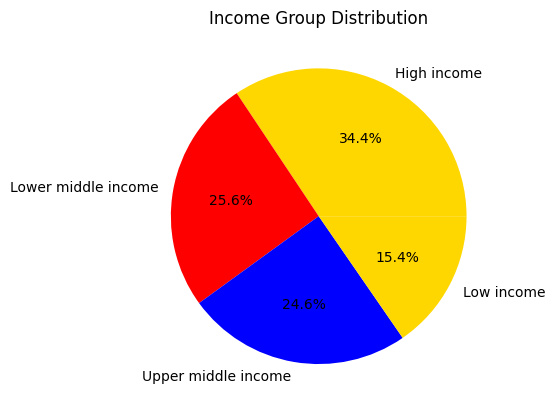

In [21]:
demo["Income Group"].value_counts().plot.pie(autopct='%1.1f%%', colors=['gold', 'red', 'blue'])
plt.title('Income Group Distribution')
plt.ylabel('')
plt.show()


<h1>Correlation between birth rate and internet usage</h1>

In [22]:
correlation = demo["Birth rate"].corr(demo["Internet users"])
print(f'Correlation between Birth Rate and Internet Users: {correlation:.2f}')


Correlation between Birth Rate and Internet Users: -0.82


<h1>The calculated correlation of -0.82 indicates a strong negative relationship between birth rates and internet usage. This suggests that as internet usage increases, birth rates tend to decrease significantly. This pattern might reflect the influence of factors such as education, access to information, and improved economic conditions associated with higher internet penetration.

</h1>